Assignment 2


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [45]:
#Import dataset
data= pd.read_csv("https://raw.githubusercontent.com/midhunmohank/Advanced-Data-Sciences-and-Architectures/main/diabetes.csv")

In [46]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# Pre-processing block

In [48]:
#Train, test and validation spilt
from sklearn.model_selection import train_test_split

data_set_values=np.array(data)
number_of_rows,number_of_cols=data.shape
train, test = train_test_split(data_set_values, test_size = 0.4,random_state=57)
test, validate = train_test_split(test, test_size = 0.5,random_state=3)

In [49]:
#Spilt all sets into input and output sets
train_x=train[:,:number_of_cols-1]
train_y=train[:,[number_of_cols-1]]

test_x=test[:,:number_of_cols-1]
test_y=test[:,[number_of_cols-1]]

validate_x=validate[:,:number_of_cols-1]
validate_y=validate[:,[number_of_cols-1]]

#perform normalization on the input data set
input_data= np.vstack((train_x,test_x,validate_x))
mean_data = np.mean(input_data, axis=0)
std_data = np.std(input_data, axis=0)
train_x = (train_x - mean_data)/std_data
test_x = (test_x - mean_data)/std_data
validate_x = (validate_x - mean_data)/std_data

In [50]:
#End of Pre-processing block

In [51]:
#Start of Logistic Regression - Part 1

In [52]:
#Logistic Regression - Model Definition
class logisticRegression:
    def __init__(self,total_iterations,learning_rate):
        self.learning_rate=learning_rate
        self.total_iterations=total_iterations
        self.bias=0
        
    #Activation function
    def sigmoidFunction(self,X): 
        return 1/(1+np.exp(-X))
#         return 1/(1+scipy.special.expit(-X))
    def relu(self,Y):
        return (np.maximum(0,Y))
    
    #Training function
    def train(self,input,Y): 

        rows,cols=input.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        costList=[]
        iterationList=[]
        for _ in range(self.total_iterations+1):
            # y= x * w + b
            output=np.dot(input,self.w)+self.bias
            
            #apply Activating function
            Z=self.relu(output)
            
            #calculating cost
            cost=(-1/self.m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))
            
            if _%1000==0:
#                 print("loss during ",_," iteration =",cost)
                iterationList.append(_)
                costList.append(cost)
            
            #Gradient Descent
            dw=(1/self.m)*np.dot(input.T,np.subtract(Z,Y))
            db=(1/self.m)*np.sum(np.subtract(Z,Y))
            
            #updating weights and bais (Learning Part)
            self.w = self.w-self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
        print(cost)
        plt.plot(iterationList, costList)
        plt.title("Cost Relation")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        return 

    #Prediction function
    def predict(self,input):
        output=np.dot(input,self.w)+self.bias
        Z=self.sigmoidFunction(output)
        # if output more than 0.5 then yes else no. (Binary Classification)
        prediction=[]
        for i in Z:
            if i>=0.5:
                prediction.append(1)
            else:
                prediction.append(0)
        return prediction

In [53]:
model=logisticRegression(total_iterations=10000,learning_rate=0.001)

/var/folders/bx/1_m4xfh535j3lyq9x8njj6140000gn/T/ipykernel_47431/546982959.py:31: RuntimeWarning: divide by zero encountered in log
  cost=(-1/self.m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))
/var/folders/bx/1_m4xfh535j3lyq9x8njj6140000gn/T/ipykernel_47431/546982959.py:31: RuntimeWarning: invalid value encountered in multiply
  cost=(-1/self.m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))
/var/folders/bx/1_m4xfh535j3lyq9x8njj6140000gn/T/ipykernel_47431/546982959.py:31: RuntimeWarning: invalid value encountered in log
  cost=(-1/self.m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))


nan


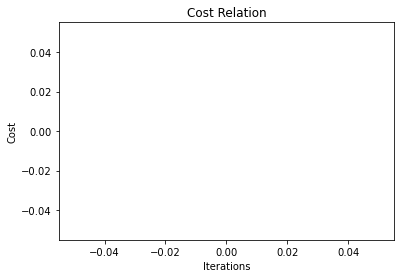

In [54]:
model.train(train_x,train_y)

In [34]:
from sklearn.metrics import accuracy_score
test_prediction = model.predict(test_x)

In [35]:
print("Accuracy = ", accuracy_score(test_y,test_prediction))

Accuracy =  0.45454545454545453


In [36]:

def perf_measure(self,y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

# Precision Score = TP / (FP + TP)
def PrecisionScore(TP, FP):
    prescision = TP / (FP + TP)
    print(f'Presision:{prescision}')
    return prescision
# Recall Score = TP / (FN + TP)
def RecallScore(TP,FN):
    recall = TP / (FN + TP)
    print(recall)
    return recall
# Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
def Accuracy(TP,TN,FN,FP):
    accuracy = (TP + TN)/ (TP + FN + TN + FP)
    print(f'Accuracy: {accuracy} %')
# F1 Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score/)
def F1Score(y_actual):

    pr = PrecisionScore()
    










In [55]:
# metrics = Metrics
# print(metrics.TP)

AttributeError: type object 'Metrics' has no attribute 'TP'

(39, 13, 86, 16)
